In [5]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import math

都是excess return

In [13]:
portfolio = pd.read_excel("Exam_Industry.xlsx",index_col = "Unnamed: 0")
market = pd.read_excel("Exam_Market.xlsx",index_col = "Unnamed: 0")

In [14]:
portfolio

,Cnsmr,Manuf,HiTec,Hlth,Other
201301,6.64,6.96,6.73,9.10,7.69
201302,0.99,0.49,1.02,-0.34,2.01
201303,5.46,3.24,4.18,5.15,4.38
201304,1.59,-1.16,0.08,1.02,-0.95
201305,5.56,4.08,5.58,4.44,4.80
...,...,...,...,...,...
202208,-0.99,0.14,-1.59,2.57,-1.83
202209,-14.20,-13.53,-12.49,-10.67,-7.84
202210,9.19,12.73,6.08,1.06,6.77
202211,3.16,2.87,-1.49,-3.89,1.29


In [15]:
market

,Mkt
201301,5.57
201302,1.29
201303,4.03
201304,1.55
201305,2.80
...,...
202208,-3.77
202209,-9.35
202210,7.83
202211,4.60


In [16]:
R = portfolio.mean()
V = portfolio.cov()

In [20]:
df = pd.DataFrame(columns=['mean', 'std_dev'],index=range(100000))
df

,mean,std_dev
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
99995,NaN,NaN
99996,NaN,NaN
99997,NaN,NaN
99998,NaN,NaN


In [22]:
i = 0
for i in range(100000):
    w = np.random.uniform(0,1,5)# 10*1 vector range[0,1],先生成w
    weight = w/w.sum()#根据题目要求定义weight
    mean = weight@R
    variance = weight.T@V@weight
    std = np.sqrt(variance)
    df.iloc[i]=[mean,std]
    i +=1

In [23]:
df

,mean,std_dev
0,0.877024,6.018489
1,0.953705,5.666867
2,0.851013,6.26255
3,0.871975,6.273162
4,0.914463,5.795326
...,...,...
99995,0.871482,5.994564
99996,0.80147,6.441934
99997,0.789887,6.205297
99998,0.885259,6.170825


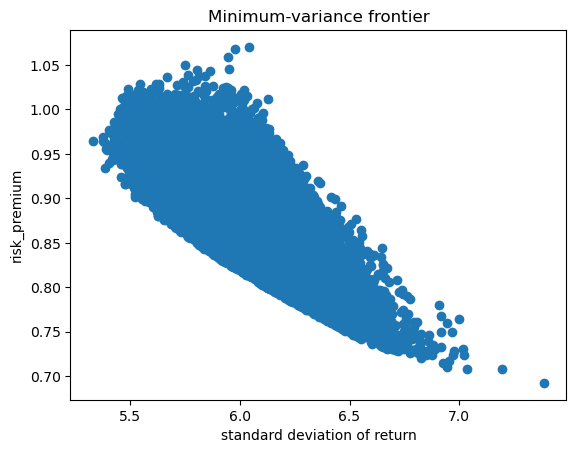

In [25]:
plt.scatter(df['std_dev'], df['mean'])
plt.xlabel('standard deviation of return')
plt.ylabel('risk_premium')
plt.title('Minimum-variance frontier')
plt.show()

In [32]:
column_means = portfolio.mean()
column_stddevs = portfolio.std()
summary_df = pd.DataFrame({"Mean":column_means,"Standard_deviation":column_stddevs})
summary_df

,Mean,Standard_deviation
Cnsmr,0.845167,6.248971
Manuf,0.782500,7.005097
HiTec,1.088917,6.043688
Hlth,0.665333,7.642189
Other,0.989417,5.261207


In [34]:
mean_array = np.array(summary_df["Mean"])
tran_mean = mean_array.T
cov = portfolio.cov()
cov_array = np.array(cov)
inverse_cov = np.linalg.inv(cov_array)
identity_matrix = np.ones(5)
tran_identity = identity_matrix.T

In [35]:
zeta = tran_mean@inverse_cov@mean_array
alepha = tran_mean@inverse_cov@identity_matrix
delta = tran_identity@inverse_cov@identity_matrix
Rmv = alepha/delta

In [36]:
def variance_computing(item):
    return 1/delta+[delta/(zeta*delta-alepha*alepha)]*(item-Rmv)*(item-Rmv)

In [43]:
rp = np.arange(0,2.6,0.1)
rp

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5])

In [44]:
result = variance_computing(rp)
sqrt_result = np.sqrt(result)

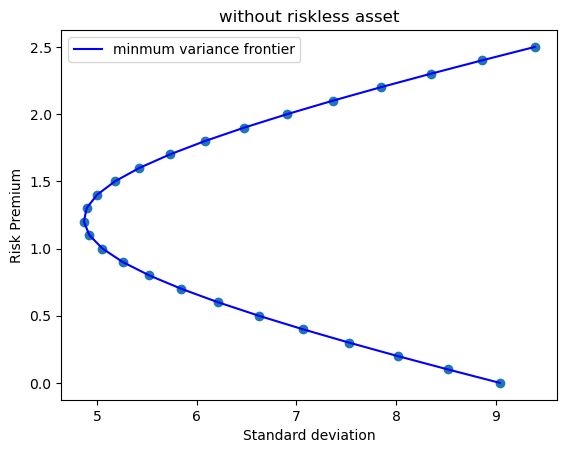

In [53]:
plt.scatter(sqrt_result,rp)
plt.plot(sqrt_result,rp,linestyle="-",color="blue",label="minmum variance frontier")
plt.xlabel("Standard deviation")
plt.ylabel("Risk Premium")
plt.title("without riskless asset")
plt.legend()
plt.show()

In [47]:
rf = 0.13

In [48]:
def variance_computing1(item):
    return ((item - rf) * (item - rf)) / (zeta - 2 * alepha * rf + delta * rf * rf)

In [49]:
result1 = variance_computing1(rp)
sqrt_result1 = np.sqrt(result1)

Text(0, 0.5, 'rp in % return per month')

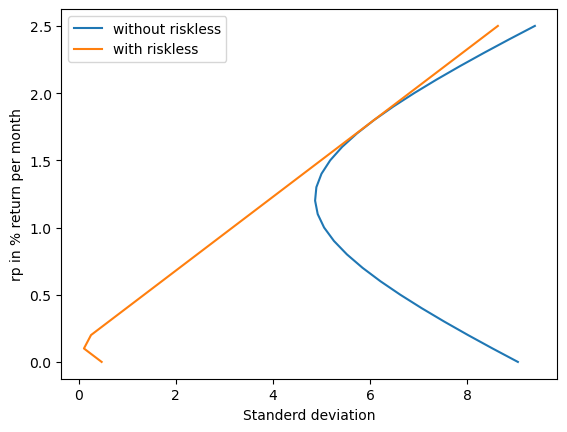

In [50]:
plt.plot(sqrt_result,rp,label="without riskless")
plt.plot(sqrt_result1,rp,label="with riskless")
plt.legend()
plt.xlabel("Standerd deviation")
plt.ylabel("rp in % return per month")

In [54]:
sharp_ratio = np.sqrt(zeta-2*alepha*rf+delta*rf*rf)
sharp_ratio

0.27455775309559044

In [56]:
rtg = (alepha*rf-zeta)/(delta*rf-alepha)

In [57]:
weight = (delta*rtg-alepha)/(zeta*delta-alepha**2)*inverse_cov@mean_array+(zeta-alepha*rtg)/(zeta*delta-alepha**2)*inverse_cov@identity_matrix

In [60]:
df = pd.DataFrame(weight,index=portfolio.columns)
df

,0
Cnsmr,-0.845577
Manuf,-1.112354
HiTec,1.884752
Hlth,-0.751801
Other,1.824980


In [68]:
alpha_beta_table=pd.DataFrame(columns=['risk premium','Beta'])
for x in portfolio.columns:
    slope, intercept, r_value, p_value, std_err=linregress(market["Mkt"],portfolio[x])#对市场超额收益和组合超额收益进行regress
    row_data = [intercept, slope]
    alpha_beta_table.loc[x] = row_data

In [69]:
alpha_beta_table

,risk premium,Beta
Cnsmr,-0.371782,1.206692
Manuf,-0.538479,1.309846
HiTec,-0.131500,1.210131
Hlth,-0.533414,1.188644
Other,-0.040284,1.021022


In [71]:
mean_monthly_return_industry=portfolio.mean()
mean_monthly_return_industry

Cnsmr    0.845167
Manuf    0.782500
HiTec    1.088917
Hlth     0.665333
Other    0.989417
dtype: float64

In [72]:
mean_monthly_return_market=market.mean()
mean_monthly_return_market

Mkt    1.0085
dtype: float64

In [73]:
mean_monthly_return_industry.loc['Mkt']=mean_monthly_return_market[0]
mean_monthly_return_industry

C:\Users\dell\AppData\Local\Temp\ipykernel_17248\832484361.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_monthly_return_industry.loc['Mkt']=mean_monthly_return_market[0]


Cnsmr    0.845167
Manuf    0.782500
HiTec    1.088917
Hlth     0.665333
Other    0.989417
Mkt      1.008500
dtype: float64

In [74]:
alpha_beta_table.loc['market']=[0.000000, 1.000000]
alpha_beta_table

,risk premium,Beta
Cnsmr,-0.371782,1.206692
Manuf,-0.538479,1.309846
HiTec,-0.131500,1.210131
Hlth,-0.533414,1.188644
Other,-0.040284,1.021022
market,0.000000,1.000000


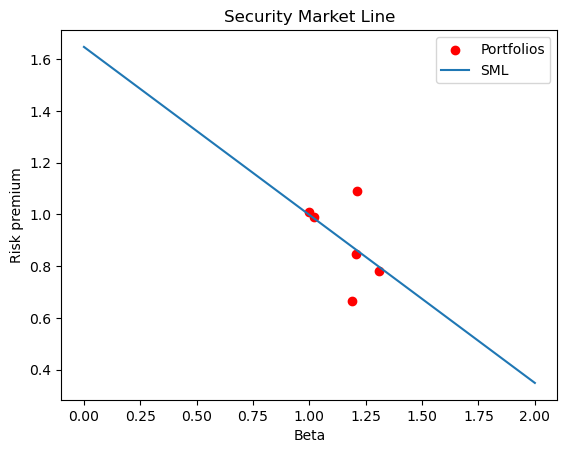

In [76]:
x=alpha_beta_table['Beta']
y=mean_monthly_return_industry
a,b=np.polyfit(x,y,1)
plt.scatter(x,y,label="Portfolios",color="r")
plt.plot([0,2],[b,a*2+b],label="SML")
plt.xlabel('Beta')
plt.ylabel('Risk premium')
plt.legend()
plt.title("Security Market Line")
plt.show()

In [77]:
epsilion = np.random.randn(10**4)
epsilion

array([-0.20212689, -0.49349466, -0.36287854, ...,  0.36782053,
        1.5178539 , -1.59798085])

In [78]:
v = np.random.uniform(0,1,10**4)

In [100]:
threshold = 0.02
v[v<=threshold] = np.log(0.6)
v[v!=np.log(0.65)] = 0

In [80]:
lng = 0.02+0.02*epsilion+v

In [81]:
b = np.arange(0,4.1,0.1)
b

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. ])

In [91]:
g = np.exp(lng)
g

array([1.01608546, 1.01018159, 1.01282396, ..., 1.02773403, 1.05164655,
       0.98811162])

In [101]:
np.exp((1-g)*i)

array([0.9376844 , 0.96009181, 0.94999758, ..., 0.89499591, 0.81335615,
       1.04870235])

4.0

In [104]:
start = 0
end = 4.1
step = 0.1
for i in np.arange(start,end,step):
    m = 0.99*np.exp((1-g)*i)

In [96]:
result_df = pd.DataFrame(columns=["γ", "μM", "σM"])
start = 0
end = 4.1
step = 0.1
for i in np.arange(start,end,step):
    m = 0.99*np.exp((1-g)*i)
    mean = np.mean(m)
    std = np.std(m)
    temp_df = pd.DataFrame({"γ": [i], "μM": [mean], "σM": [std]})
    result_df = pd.concat([result_df, temp_df], ignore_index=True)
result_df

C:\Users\dell\AppData\Local\Temp\ipykernel_17248\744839979.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, temp_df], ignore_index=True)


,γ,μM,σM
0,0.0,0.990000,0.000000
1,0.1,0.987962,0.002011
2,0.2,0.985933,0.004013
3,0.3,0.983912,0.006007
4,0.4,0.981899,0.007992
5,0.5,0.979894,0.009969
6,0.6,0.977897,0.011938
7,0.7,0.975909,0.013898
8,0.8,0.973928,0.015850
9,0.9,0.971956,0.017794


In [97]:
result_df["σM/μM"] = result_df["σM"]/result_df["μM"]
result_df

,γ,μM,σM,σM/μM
0,0.0,0.990000,0.000000,0.000000
1,0.1,0.987962,0.002011,0.002035
2,0.2,0.985933,0.004013,0.004070
3,0.3,0.983912,0.006007,0.006105
4,0.4,0.981899,0.007992,0.008140
5,0.5,0.979894,0.009969,0.010174
6,0.6,0.977897,0.011938,0.012207
7,0.7,0.975909,0.013898,0.014241
8,0.8,0.973928,0.015850,0.016274
9,0.9,0.971956,0.017794,0.018307


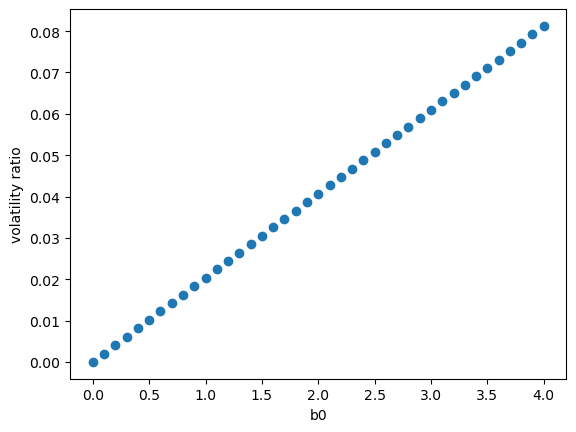

In [109]:
plt.scatter(b,result_df["σM/μM"])#0.4是最大的sharp ratio
plt.ylabel("volatility ratio")
plt.xlabel("b0")
plt.show()

In [111]:
column_means = portfolio.mean()
column_stddevs = portfolio.std()
summary_df = pd.DataFrame({"Risk Premium":column_means,"Standard_deviation":column_stddevs})
summary_df

,Risk Premium,Standard_deviation
Cnsmr,0.845167,6.248971
Manuf,0.782500,7.005097
HiTec,1.088917,6.043688
Hlth,0.665333,7.642189
Other,0.989417,5.261207


In [112]:
alpha_beta_table = pd.DataFrame(columns = ['Alpha', 'Beta'])

for i in portfolio.columns:
    slope, intercept, r_value, p_value, std_err = linregress(market["Mkt"],
                                                             portfolio[i])#regress on market excess return and portfolio excess return
    
    row_data = [intercept, slope]
    alpha_beta_table.loc[i] = row_data

alpha_beta_table

,Alpha,Beta
Cnsmr,-0.371782,1.206692
Manuf,-0.538479,1.309846
HiTec,-0.131500,1.210131
Hlth,-0.533414,1.188644
Other,-0.040284,1.021022


In [114]:
treynor = (portfolio.mean())/alpha_beta_table["Beta"]
treynor_ratio = pd.DataFrame(treynor,columns=["Treynor_Ratio"])
treynor_ratio

,Treynor_Ratio
Cnsmr,0.700400
Manuf,0.597399
HiTec,0.899834
Hlth,0.559742
Other,0.969046


In [141]:
market.mean()/1

Mkt    1.0085
dtype: float64

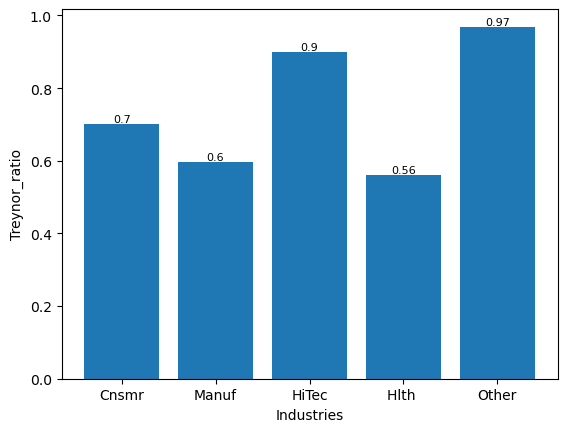

In [115]:
plt.bar(portfolio.columns,treynor)
plt.xlabel("Industries")
plt.ylabel("Treynor_ratio")
for i, v in enumerate(treynor_ratio['Treynor_Ratio'].values):
        plt.text(i, v+0.005, round(v,2), ha='center', fontsize=8)
plt.show()

In [118]:
rp = np.arange(0,0.161,0.005)
result = variance_computing(rp)
sqrt_result = np.sqrt(result)

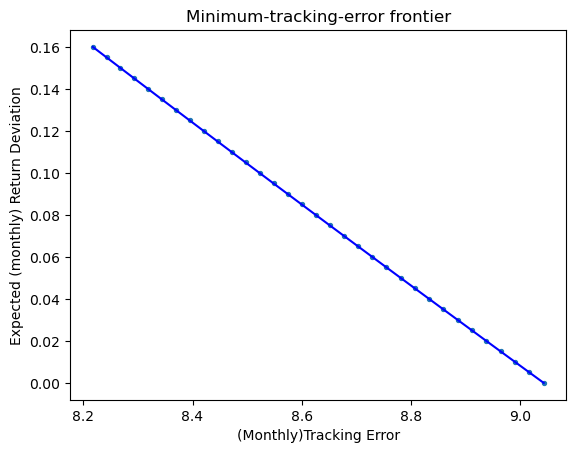

In [119]:
plt.scatter(sqrt_result,rp,s=8)
plt.plot(sqrt_result,rp,linestyle="-",color="blue")
plt.xlabel("(Monthly)Tracking Error")
plt.ylabel("Expected (monthly) Return Deviation")
plt.title('Minimum-tracking-error frontier')
plt.show()

In [121]:
a = portfolio - market.values
a

,Cnsmr,Manuf,HiTec,Hlth,Other
201301,1.07,1.39,1.16,3.53,2.12
201302,-0.30,-0.80,-0.27,-1.63,0.72
201303,1.43,-0.79,0.15,1.12,0.35
201304,0.04,-2.71,-1.47,-0.53,-2.50
201305,2.76,1.28,2.78,1.64,2.00
...,...,...,...,...,...
202208,2.78,3.91,2.18,6.34,1.94
202209,-4.85,-4.18,-3.14,-1.32,1.51
202210,1.36,4.90,-1.75,-6.77,-1.06
202211,-1.44,-1.73,-6.09,-8.49,-3.31


In [133]:
summary_df

,Mean,Standard_deviation
Cnsmr,-0.163333,3.355605
Manuf,-0.226000,4.150357
HiTec,0.080417,2.932811
Hlth,-0.343167,5.596713
Other,-0.019083,2.681778


In [122]:
column_means = a.mean()
column_stddevs = a.std()
summary_df = pd.DataFrame({"Mean":column_means,"Standard_deviation":column_stddevs})
summary_df
mean_array = np.array(summary_df["Mean"])
tran_mean = mean_array.T
cov = a.cov()
cov_array = np.array(cov)
inverse_cov = np.linalg.inv(cov_array)
identity_matrix = np.ones(5)
tran_identity = identity_matrix.T
zeta = tran_mean@inverse_cov@mean_array
alepha = tran_mean@inverse_cov@identity_matrix
delta = tran_identity@inverse_cov@identity_matrix
Rmv = alepha/delta
def variance_computing(item):
    return 1/delta+[delta/(zeta*delta-alepha*alepha)]*(item-Rmv)*(item-Rmv)

In [130]:
variance_computing(rp)
result = variance_computing(rp)
sqrt_result = np.sqrt(result)

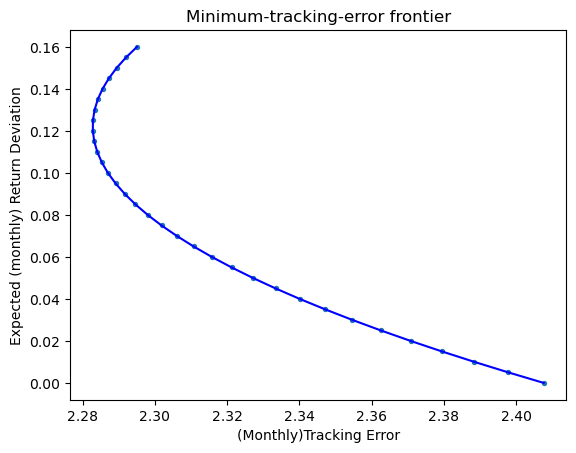

In [131]:
plt.scatter(sqrt_result,rp,s=8)
plt.plot(sqrt_result,rp,linestyle="-",color="blue")
plt.xlabel("(Monthly)Tracking Error")
plt.ylabel("Expected (monthly) Return Deviation")
plt.title('Minimum-tracking-error frontier')
plt.show()

In [132]:
information_ratio = linregress(sqrt_result,rp)
information_ratio[0]

-1.1276814708476073

In [134]:
sharpe = (portfolio.mean())/(portfolio.std())
sharpe_ratio = pd.DataFrame(sharpe,columns=["Sharpe_Ratio"])
sharpe_ratio

,Sharpe_Ratio
Cnsmr,0.135249
Manuf,0.111704
HiTec,0.180174
Hlth,0.087061
Other,0.188059


In [140]:
market.mean()/market.std()

Mkt    0.227439
dtype: float64

In [135]:
mean_monthly_return_industry

Cnsmr    0.845167
Manuf    0.782500
HiTec    1.088917
Hlth     0.665333
Other    0.989417
Mkt      1.008500
dtype: float64

In [138]:
portfolio

,Cnsmr,Manuf,HiTec,Hlth,Other
201301,6.64,6.96,6.73,9.10,7.69
201302,0.99,0.49,1.02,-0.34,2.01
201303,5.46,3.24,4.18,5.15,4.38
201304,1.59,-1.16,0.08,1.02,-0.95
201305,5.56,4.08,5.58,4.44,4.80
...,...,...,...,...,...
202208,-0.99,0.14,-1.59,2.57,-1.83
202209,-14.20,-13.53,-12.49,-10.67,-7.84
202210,9.19,12.73,6.08,1.06,6.77
202211,3.16,2.87,-1.49,-3.89,1.29


In [139]:
b = pd.concat([portfolio,market],ignore_index=True)
b

,Cnsmr,Manuf,HiTec,Hlth,Other,Mkt
0,6.64,6.96,6.73,9.10,7.69,NaN
1,0.99,0.49,1.02,-0.34,2.01,NaN
2,5.46,3.24,4.18,5.15,4.38,NaN
3,1.59,-1.16,0.08,1.02,-0.95,NaN
4,5.56,4.08,5.58,4.44,4.80,NaN
...,...,...,...,...,...,...
235,NaN,NaN,NaN,NaN,NaN,-3.77
236,NaN,NaN,NaN,NaN,NaN,-9.35
237,NaN,NaN,NaN,NaN,NaN,7.83
238,NaN,NaN,NaN,NaN,NaN,4.60


In [142]:
downside = portfolio.copy()#针对组合超额收益计算半方差
downside[downside>0] = 0
downside

,Cnsmr,Manuf,HiTec,Hlth,Other
201301,0.00,0.00,0.00,0.00,0.00
201302,0.00,0.00,0.00,-0.34,0.00
201303,0.00,0.00,0.00,0.00,0.00
201304,0.00,-1.16,0.00,0.00,-0.95
201305,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...
202208,-0.99,0.00,-1.59,0.00,-1.83
202209,-14.20,-13.53,-12.49,-10.67,-7.84
202210,0.00,0.00,0.00,0.00,0.00
202211,0.00,0.00,-1.49,-3.89,0.00


In [143]:
downside_return = (downside*downside).mean()
sortino = (portfolio.mean())/(np.sqrt(downside_return))
sortino_ratio = pd.DataFrame(sortino,columns=["Sortino_Ratio"])
sortino_ratio

,Sortino_Ratio
Cnsmr,0.210609
Manuf,0.170922
HiTec,0.286594
Hlth,0.128389
Other,0.282145
